## HT7 - Proyecto 2. Entrega 5
### Regresión Logística 
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

c:\Users\diego\OneDrive\Escritorio\2025\Semestre VII\Mineria\LogisticRegression\logReg.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


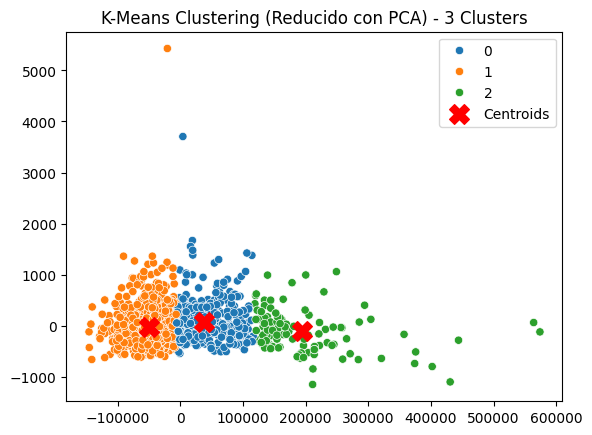

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
import logReg

cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = logReg.breif_clustering(cluster_set, 3)

In [3]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [24]:
# Asumiendo que ya ejecutaste el clustering y tienes `cluster_set['Cluster']`

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Crear variables dicotómicas (dummy) para cada grupo de precio
house_prices['barato'] = (house_prices['price_group'] == 1).astype(int)
house_prices['medio'] = (house_prices['price_group'] == 0).astype(int)
house_prices['caro'] = (house_prices['price_group'] == 2).astype(int)

# Opcional: revisar distribución
print(house_prices[['barato', 'medio', 'caro']].sum())


barato    826
medio     518
caro      116
dtype: int64


In [25]:
logReg.drop_many_nulls(house_prices)


cheapHouses = logReg.trans_categorical(house_prices).drop(['price_group', 'medio', 'caro'], axis=1)
mediumHouses = logReg.trans_categorical(house_prices).drop(['price_group', 'barato', 'caro'], axis=1)
expensiveHouses = logReg.trans_categorical(house_prices).drop(['price_group', 'medio', 'barato'], axis=1)


Precio mínimo: $34900
Precio máximo: $174500


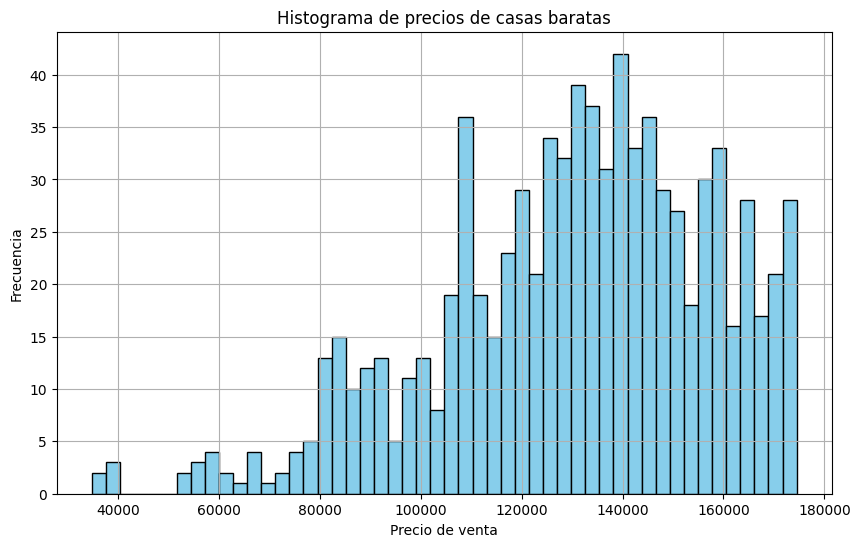

In [26]:
import matplotlib.pyplot as plt

# Filtrar casas baratas
casas_baratas = cheapHouses[cheapHouses["barato"] == 1]

# Calcular mínimo y máximo
precio_min = casas_baratas["SalePrice"].min()
precio_max = casas_baratas["SalePrice"].max()

print(f"Precio mínimo: ${precio_min}")
print(f"Precio máximo: ${precio_max}")

# Crear histograma
plt.figure(figsize=(10,6))
plt.title("Histograma de precios de casas baratas")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.hist(casas_baratas["SalePrice"], bins=50, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()



Precio mínimo (medio): $174900
Precio máximo (medio): $297000


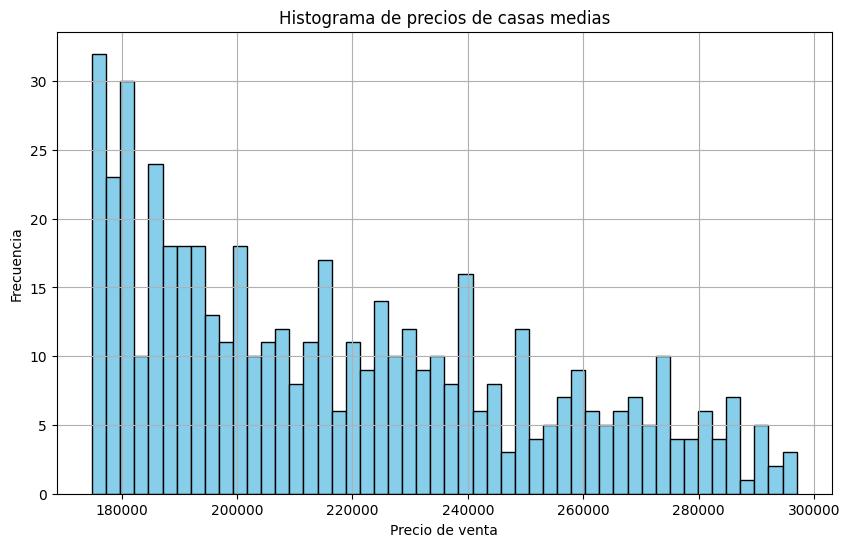

In [27]:
import matplotlib.pyplot as plt

# Filtrar casas medias
casas_medias = mediumHouses[mediumHouses["medio"] == 1]

# Calcular mínimo y máximo
precio_min = casas_medias["SalePrice"].min()
precio_max = casas_medias["SalePrice"].max()

print(f"Precio mínimo (medio): ${precio_min}")
print(f"Precio máximo (medio): ${precio_max}")

# Crear histograma
plt.figure(figsize=(10,6))
plt.title("Histograma de precios de casas medias")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.hist(casas_medias["SalePrice"], bins=50, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()



Precio mínimo (caro): $299800
Precio máximo (caro): $755000


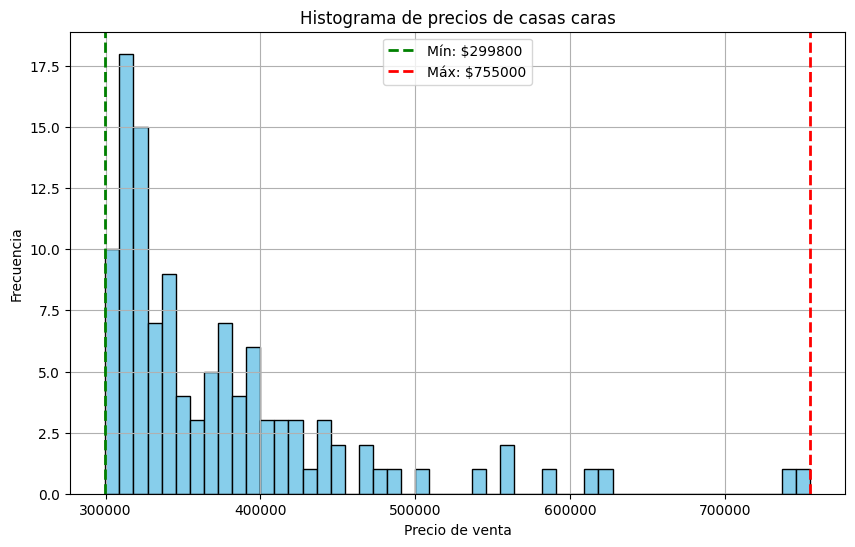

In [23]:
import matplotlib.pyplot as plt

# Filtrar casas caras
casas_caras = expensiveHouses[expensiveHouses["caro"] == 1]

# Calcular mínimo y máximo
precio_min = casas_caras["SalePrice"].min()
precio_max = casas_caras["SalePrice"].max()

print(f"Precio mínimo (caro): ${precio_min}")
print(f"Precio máximo (caro): ${precio_max}")

# Crear histograma
plt.figure(figsize=(10,6))
plt.title("Histograma de precios de casas caras")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.hist(casas_caras["SalePrice"], bins=50, color='skyblue', edgecolor='black')

# Agregar líneas de mínimo y máximo
plt.axvline(precio_min, color='green', linestyle='dashed', linewidth=2, label=f"Mín: ${precio_min}")
plt.axvline(precio_max, color='red', linestyle='dashed', linewidth=2, label=f"Máx: ${precio_max}")

plt.legend()
plt.grid(True)
plt.show()
